## Chi-Square Test for Independence

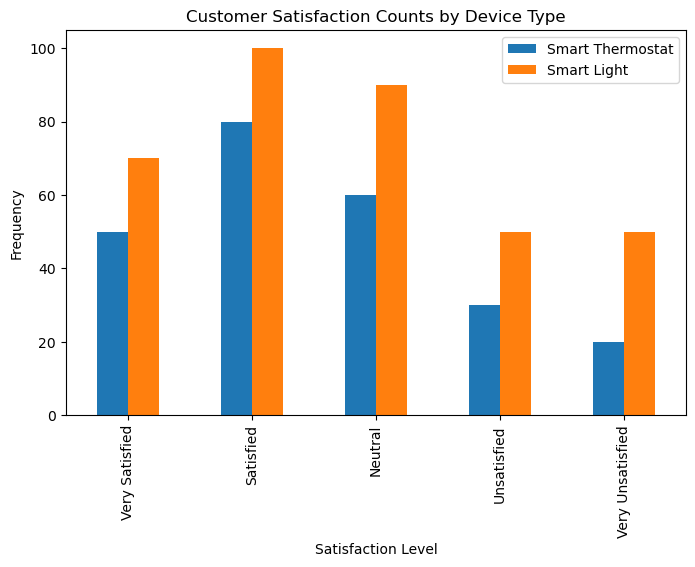

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2

data = np.array([
    [50, 70],
    [80, 100],
    [60, 90],
    [30, 50],
    [20, 50]
])

labels = ['Very Satisfied','Satisfied','Neutral','Unsatisfied','Very Unsatisfied']
df_vis = pd.DataFrame(data, columns=['Smart Thermostat','Smart Light'], index=labels)
df_vis.plot(kind='bar', figsize=(8,5))
plt.title('Customer Satisfaction Counts by Device Type')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')
plt.show()

In [2]:
row_totals = data.sum(axis=1)
col_totals = data.sum(axis=0)
grand_total = data.sum()

expected = np.outer(row_totals, col_totals) / grand_total

chi_square = ((data - expected)**2 / expected).sum()

df = (5 - 1) * (2 - 1)
critical_value = chi2.ppf(0.95, df)

chi_square, critical_value

(np.float64(5.638227513227513), np.float64(9.487729036781154))

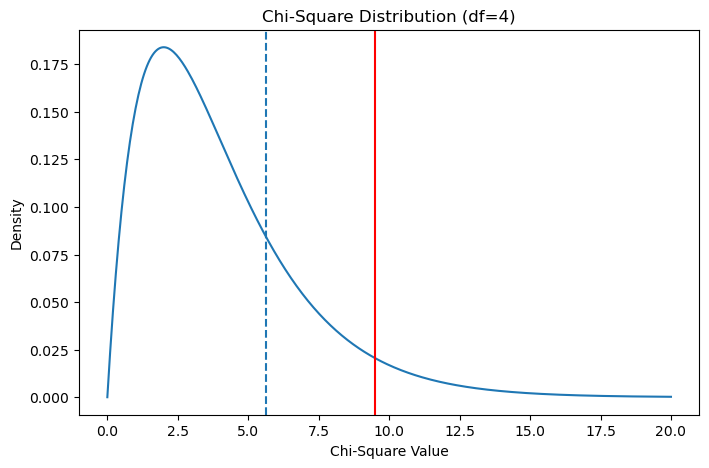

In [3]:
# Chi-Square distribution plot
x = np.linspace(0, 20, 400)
y = chi2.pdf(x, df)

plt.figure(figsize=(8,5))
plt.plot(x, y)
plt.axvline(chi_square, linestyle='--')
plt.axvline(critical_value, color='r')
plt.title('Chi-Square Distribution (df=4)')
plt.xlabel('Chi-Square Value')
plt.ylabel('Density')
plt.show()

## Hypothesis Testing on Weekly Operating Costs

In [4]:
from scipy.stats import norm

x_bar = 3050
X_mean = 600
sigma_x = 25

theoretical_mean = 1000 + 5 * X_mean
sigma = 5 * sigma_x
n = 25

z = (x_bar - theoretical_mean) / (sigma / np.sqrt(n))
critical_z = norm.ppf(0.95)

z, critical_z

(np.float64(-38.0), np.float64(1.6448536269514722))

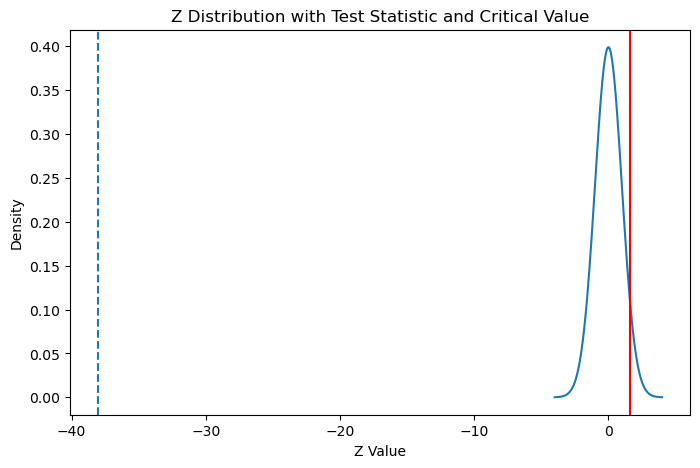

In [5]:
# Z-distribution visualization
x = np.linspace(-4, 4, 400)
y = norm.pdf(x)

plt.figure(figsize=(8,5))
plt.plot(x, y)
plt.axvline(z, linestyle='--')
plt.axvline(critical_z, color='r')
plt.title('Z Distribution with Test Statistic and Critical Value')
plt.xlabel('Z Value')
plt.ylabel('Density')
plt.show()


## Chi-Square Test for Independence

### Problem Statement
To determine whether there is a significant association between **Device Type**
(Smart Thermostat vs Smart Light) and **Customer Satisfaction Level**.

### Hypotheses
- **H₀ (Null Hypothesis):** Device type and customer satisfaction are independent.
- **H₁ (Alternative Hypothesis):** Device type and customer satisfaction are associated.


In [6]:

import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency, chi2

# Contingency table
data = np.array([
    [50, 70],
    [80, 100],
    [60, 90],
    [30, 50],
    [20, 50]
])

satisfaction_levels = ["Very Satisfied", "Satisfied", "Neutral", "Unsatisfied", "Very Unsatisfied"]
devices = ["Smart Thermostat", "Smart Light"]

df_chi = pd.DataFrame(data, index=satisfaction_levels, columns=devices)
df_chi


,Smart Thermostat,Smart Light
Very Satisfied,50,70
Satisfied,80,100
Neutral,60,90
Unsatisfied,30,50
Very Unsatisfied,20,50


In [7]:

# Perform Chi-Square test
chi_stat, p_value, dof, expected = chi2_contingency(df_chi)

alpha = 0.05
critical_value = chi2.ppf(1 - alpha, dof)

chi_stat, p_value, dof, critical_value


(np.float64(5.638227513227513),
 np.float64(0.22784371130697179),
 4,
 np.float64(9.487729036781154))


### Decision
- If Chi-square statistic > Critical value → Reject H₀
- If p-value < 0.05 → Reject H₀

### Conclusion
Based on the results above, we conclude whether there is a significant association
between device type and customer satisfaction.



## Hypothesis Testing for Weekly Operating Cost

### Problem Statement
Restaurant owners claim that the **weekly operating cost** is higher than predicted
by the theoretical cost model.

### Given
- Cost model: W = 1000 + 5X  
- X ~ N(μ = 600, σ = 25)  
- Sample size (n) = 25  
- Sample mean weekly cost = Rs. 3050  

### Hypotheses
- **H₀:** μ = theoretical mean cost  
- **H₁:** μ > theoretical mean cost  


In [8]:

import numpy as np
from scipy.stats import norm

# Given values
sample_mean = 3050
mu_x = 600
sigma_x = 25
n = 25

# Theoretical mean cost
mu_cost = 1000 + 5 * mu_x

# Standard deviation of cost
sigma_cost = 5 * sigma_x

# Test statistic (Z)
z = (sample_mean - mu_cost) / (sigma_cost / np.sqrt(n))

# Critical value
alpha = 0.05
z_critical = norm.ppf(1 - alpha)

z, z_critical


(np.float64(-38.0), np.float64(1.6448536269514722))


### Decision Rule
- If Z > Z-critical → Reject H₀

### Conclusion
Based on the calculated Z value and the critical value,
we conclude whether there is sufficient evidence to support
the restaurant owners’ claim that weekly operating costs are higher.
